# Objective of the lab

- Formulate in clear and concise sentences your hypothesis

- Reasoning and motivation for any statistical analysis you will implement in Python and interpretations of the Python outputs

- You will present your analysis in a python notebook that will contain:
    - Reproducible codes
    - All necessary graphs and outputs and your complete reasoning. All figures should be clearly labeled and readable.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices,dmatrix
import statsmodels.api as sm

sns.set_theme(palette='colorblind')

In [7]:
df = pd.read_csv('lab2_bea-2006.csv')

In [6]:
df = df.set_index('MSA', drop=True)
df.head()

,pcgmp,pop,finance,prof.tech,ict,management
MSA,,,,,,
"Abilene, TX",24490,158700.0,0.09750,NaN,0.01621,NaN
"Akron, OH",32890,699300.0,0.12940,0.05440,NaN,0.054310
"Albany, GA",24270,163000.0,0.08217,NaN,0.00708,NaN
"Albany-Schenectady-Troy, NY",36840,850300.0,0.15780,0.09399,0.04511,NaN
"Albuquerque, NM",37660,816000.0,0.15990,0.09978,0.20500,0.006509


- the population
- the total value of all goods and services produced for sale in the city that year per person (per capita gross metropolitan product", pcgmp)
- the share of economic output coming from four selected industries

In [8]:
df.describe()

,pcgmp,pop,finance,prof.tech,ict,management
count,366.000000,3.660000e+02,354.000000,254.000000,290.000000,209.000000
mean,32922.759563,6.808977e+05,0.150825,0.049051,0.039100,0.009083
std,9219.907216,1.554965e+06,0.061775,0.028238,0.058392,0.008797
min,14920.000000,5.498000e+04,0.038450,0.014740,0.003490,0.000416
25%,26532.500000,1.356250e+05,0.104025,0.029320,0.012150,0.002941
50%,31615.000000,2.315000e+05,0.141400,0.042125,0.022175,0.006509
75%,38212.500000,5.308750e+05,0.181225,0.059323,0.040722,0.011910
max,77860.000000,1.885000e+07,0.384800,0.190800,0.586000,0.054310


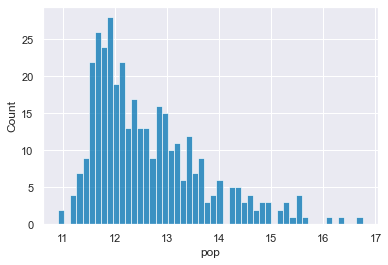

In [19]:
sns.histplot(np.log(df['pop']), bins=50)

In [20]:
df[df['pop'] == df['pop'].max()]

,MSA,pcgmp,pop,finance,prof.tech,ict,management
237,"New York-Northern New Jersey-Long Island, NY-N...",54050,18850000.0,0.3314,0.09471,0.04795,NaN


The distribution of city (metro area) populations has a highly positive skewness, with the New York-Northern New Jersey-Long Island area having the highest documented population. Plotting the distribution on the log scale (low panel) allows for a more informative inspection.

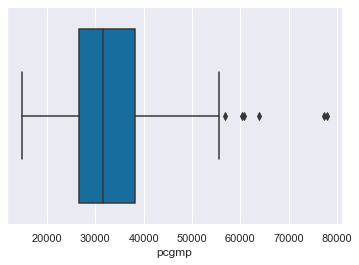

In [25]:
sns.boxplot(x=df['pcgmp'])

In [23]:
df[df['pcgmp'] == df['pcgmp'].max()]

,MSA,pcgmp,pop,finance,prof.tech,ict,management
46,"Bridgeport-Stamford-Norwalk, CT",77860,890500.0,0.3791,0.08485,NaN,0.04285


Similar to population, the distribution of per-capita GMP has a positive skewness. The mean per-capita GMP over all 366 cities is approximately  33,000  per person-year, while Bridgeport-Stamford-Norwalk, CT boasts a per-capita GMP of  78,000  per person-year, approximately 5 standard deviations above the mean.

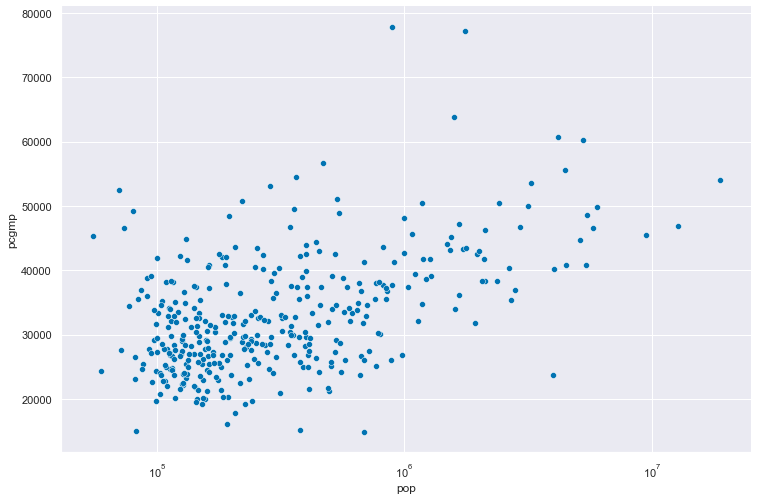

In [27]:
fig = sns.relplot(data=df, x='pop', y='pcgmp', aspect=1.5, height=7)
fig.set(xscale='log')

Per-capita GMP and population have a positive association. This trend is most apparent on the log scale.

In [36]:
X, y = df['pop'], df['pcgmp']

b1_hat = np.cov(X, y)[0, 1] / np.var(X)
b0_hat = np.mean(y) - b1_hat * np.mean(X)

print('b0_hat: %.3f, b1_hat: %.3f' % (b0_hat, b1_hat))

b0_hat: 31273.066, b1_hat: 0.002


In [40]:
y, X = dmatrices('pcgmp ~ pop', data=df, return_type='dataframe')
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pcgmp   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     72.48
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           4.49e-16
Time:                        11:33:36   Log-Likelihood:                -3826.9
No. Observations:                 366   AIC:                             7658.
Df Residuals:                     364   BIC:                             7666.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.128e+04    481.213     64.997      0.000    3.03e+04    3.22e+04
pop            0.0024      0.000      8.514      0.000       0.002       0.003
==============================================================================
Omnibus:                       86.720   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.419
Skew:                           1.100   Prob(JB):                     2.29e-53
Kurtosis:                       6.325   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

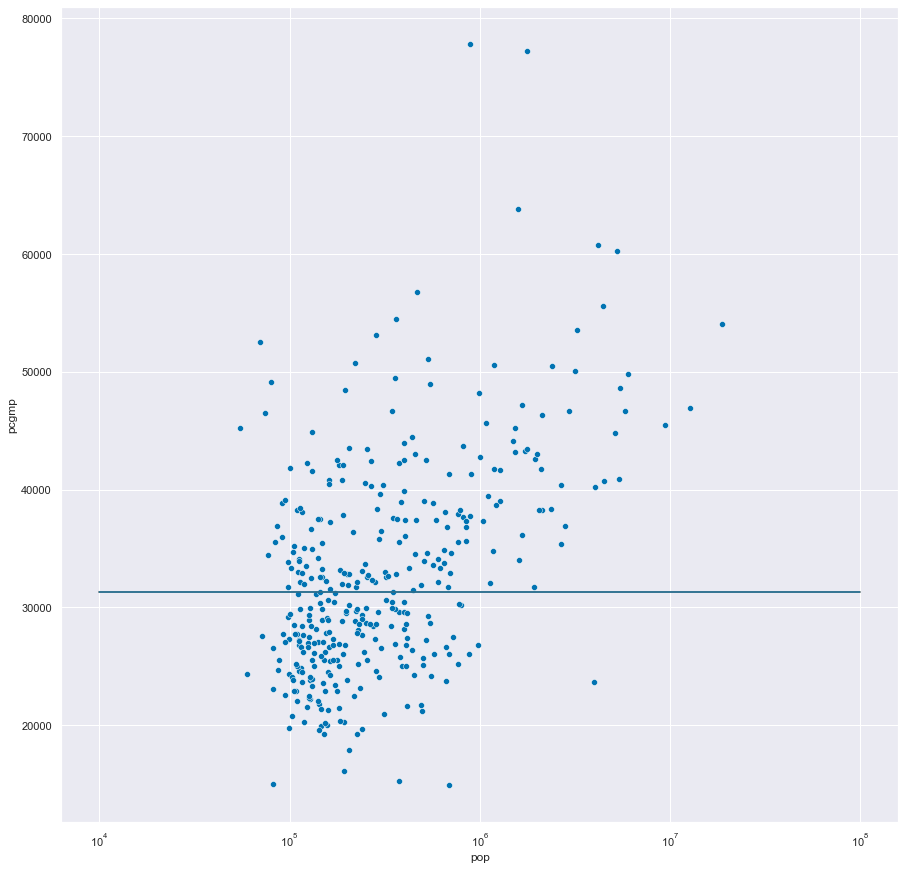

In [57]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(data=df, x='pop', y='pcgmp', ax=ax)
plt.xscale('log')

x_axis = np.linspace(1e4, 1e8, 500)
y_hat1 = b0_hat + np.log(x_axis) * b1_hat
y_hat2 = res.params[0] + np.log(x_axis) * res.params[1]
plt.plot(x_axis, y_hat1, c='r')
plt.plot(x_axis, y_hat2, c='b')

In [65]:
df[df.MSA == 'Pittsburgh, PA']

,MSA,pcgmp,pop,finance,prof.tech,ict,management
261,"Pittsburgh, PA",38350,2361000.0,0.2018,0.0777,0.03434,0.02946


In [66]:
res.fittedvalues[261]

36982.224592253006

In [67]:
res.resid[261]

1367.7754077469945

In [70]:
mse = np.mean(res.resid ** 2)
mse

70697144.9229758

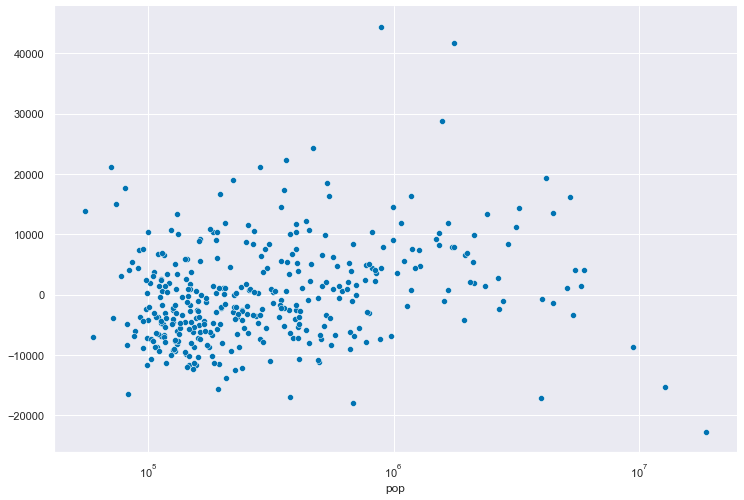

In [91]:
fig = sns.relplot(data=df, x='pop', y=res.resid, height=7, aspect=1.5)
fig.set(xscale='log')

If the assumptions held, we would have a symmetric and homoskedastic scatter centered around 0, like on the following plot (generated Gaussian errors). More precisely, we observe that the residuals are mostly negative at low population and mostly positive at populations above $10^6$. Furthermore, we can observe several outliers which are not well-explained by the homoskedastic linear model.

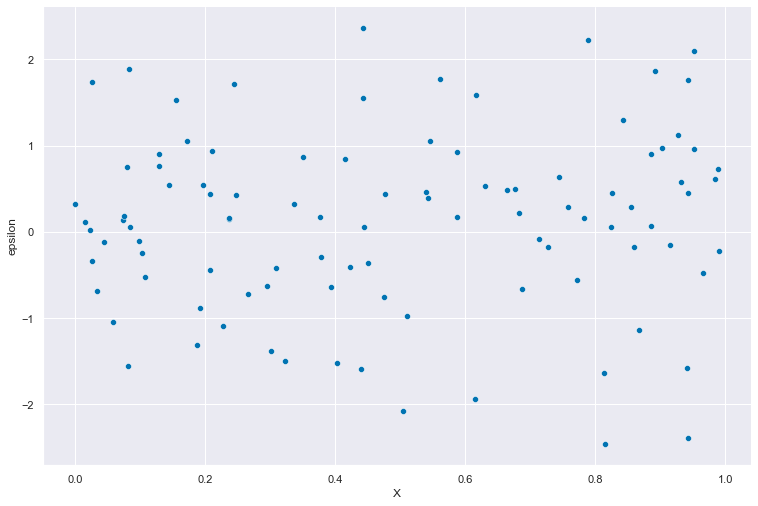

In [92]:
X = np.random.uniform(size=100)
epsilon = np.random.randn(100)
df_test = pd.DataFrame({'X': X, 'epsilon': epsilon})
sns.relplot(data=df_test, x='X', y='epsilon', height=7, aspect=1.5)

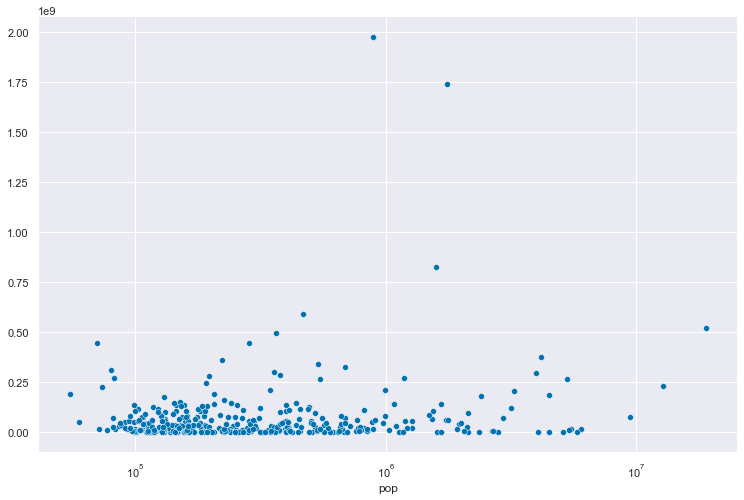

In [95]:
fig = sns.relplot(data=df, x='pop', y=res.resid ** 2, height=7, aspect=1.5)
fig.set(xscale='log')

If the homoskedasticity assumption was verified, the squared residuals would be scattered around zero and have a constant variance over all values of population. This assumptions is clearly violated by three residuals.

In [116]:
df.iloc[(res.resid ** 2).sort_values(axis='index')[-3:].index]

,MSA,pcgmp,pop,finance,prof.tech,ict,management
61,"Charlotte-Gastonia-Concord, NC-SC",63800,1580000.0,0.3848,NaN,0.04064,NaN
302,"San Jose-Sunnyvale-Santa Clara, CA",77260,1762000.0,0.1442,0.13280,0.41150,0.006324
46,"Bridgeport-Stamford-Norwalk, CT",77860,890500.0,0.3791,0.08485,NaN,0.042850


Based on this sample data, the total value of all goods and services produced for sale sale per person in a city in 2006 has a highly significant positive correlation with the population of the city. On average, a 1,000 people increase in population leads to an increase of $2.5 in per-capita GMP.